In [2]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import os
import sys
import math
import datetime
import warnings

In [10]:
class Vehicle:
    def __init__(self, brand, price):
        self.__brand = brand
        self.__price = price

    def get_brand(self):
        return self.__brand

    def set_brand(self, brand):
        self.__brand = brand

    def get_price(self):
        return self.__price

    def set_price(self, price):
        self.__price = price

class Car(Vehicle):
    def __init__(self, brand, price, fuel_type):
        super().__init__(brand, price)
        self.fuel_type = fuel_type

    def display_details(self):
        print(f"Brand: {self.get_brand()}")
        print(f"Price: ${self.get_price()}")
        print(f"Fuel Type: {self.fuel_type}")
        print("")

car1 = Car("Toyota", 30000, "Petrol")
car2 = Car("Honda", 25000, "Diesel")

car1.set_price(32000)

car1.display_details()
car2.display_details()


Brand: Toyota
Price: $32000
Fuel Type: Petrol

Brand: Honda
Price: $25000
Fuel Type: Diesel



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("car_evaluation_dataset.csv")

print(df.sample(10))
print(df.shape)

print(df.isnull().sum())

print(df['class'].value_counts())

filtered = df[(df['doors'] == '4') & (df['safety'] == 'high')]
print(filtered)

doors_mapping = {"2": 2, "3": 3, "4": 4, "5more": 5}
df['doors_encoded'] = df['doors'].map(doors_mapping)

doors_array = df['doors_encoded'].to_numpy()
print("Mean:", np.mean(doors_array))
print("Median:", np.median(doors_array))
values, counts = np.unique(doors_array, return_counts=True)
print("Most occurring value:", values[np.argmax(counts)])

doors_multiplied = doors_array * 3.5
print(doors_multiplied)

plt.figure(figsize=(8,5))
df['safety'].value_counts().plot(kind='bar', color='skyblue', label='Safety')
plt.xlabel("Safety")
plt.ylabel("Count")
plt.title("Count of cars by safety")
plt.show()

plt.figure(figsize=(8,5))
df['lug_boot'].value_counts().plot(kind='bar', color='orange', label='Lug Boot')
plt.xlabel("Lug Boot")
plt.ylabel("Count")
plt.title("Count of cars by lug_boot")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'car_evaluation_dataset.csv'

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cheezious.com"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

restaurants = []
menu_items = []
prices = []

for restaurant in soup.find_all("div", class_="restaurant-card"):
    name = restaurant.find("h3").text.strip()
    restaurants.append(name)
    for item in restaurant.find_all("div", class_="menu-item"):
        menu_name = item.find("h4").text.strip()
        price = item.find("span", class_="price").text.strip()
        menu_items.append(menu_name)
        prices.append(price)
        restaurants.append(name)

data = pd.DataFrame({"Restaurant": restaurants, "Menu Item": menu_items, "Price": prices})
data.to_csv("cheezious_menu.csv", index=False)
print(data)


In [3]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5])
print("Array:", arr)
print("Mean:", np.mean(arr))
print("Squared:", arr ** 2)


Array: [1 2 3 4 5]
Mean: 3.0
Squared: [ 1  4  9 16 25]


In [4]:
import pandas as pd

data = {
    "Name": ["Ali", "Sara", "Jawad"],
    "Age": [21, 22, 23],
    "Score": [85, 90, 88]
}

df = pd.DataFrame(data)
print(df)
print("\nAverage Score:", df["Score"].mean())


    Name  Age  Score
0    Ali   21     85
1   Sara   22     90
2  Jawad   23     88

Average Score: 87.66666666666667


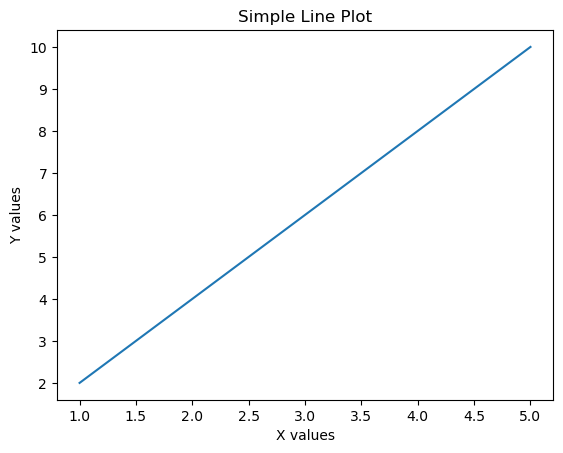

In [5]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Simple Line Plot")
plt.show()


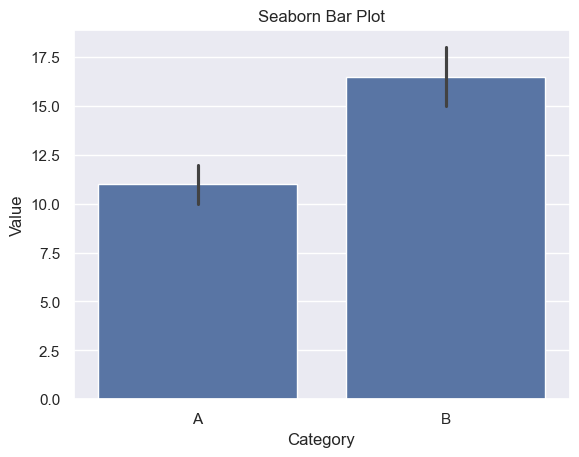

In [6]:
import seaborn as sns

sns.set_theme()

df = pd.DataFrame({
    "Category": ["A", "A", "B", "B"],
    "Value": [10, 12, 15, 18]
})

sns.barplot(x="Category", y="Value", data=df)
plt.title("Seaborn Bar Plot")
plt.show()


In [8]:
import requests
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/Web_scraping"
response = requests.get(url)

if response.status_code == 200:
    print("Request successful!")

    soup = BeautifulSoup(response.text, "html.parser")

    title = soup.find("h1").text
    first_paragraph = soup.find("p").text.strip()

    print("Title:", title)
    print("\nFirst Paragraph:\n", first_paragraph)
else:
    print("Failed to fetch webpage. Status code:", response.status_code)



Failed to fetch webpage. Status code: 403


In [9]:
import requests
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/Web_scraping"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    print("Request successful!")

    soup = BeautifulSoup(response.text, "html.parser")

    title = soup.find("h1").get_text(strip=True)

    paragraphs = soup.find_all("p")
    first_paragraph = ""

    for p in paragraphs:
        text = p.get_text(strip=True)
        if text:
            first_paragraph = text
            break

    print("Title:", title)
    print("\nFirst Paragraph:\n", first_paragraph)
else:
    print("Failed to fetch webpage. Status code:", response.status_code)


Request successful!
Title: Web scraping

First Paragraph:
 Web scraping,web harvesting, orweb data extractionisdata scrapingused forextracting datafromwebsites.[1]Web scraping software may directly access theWorld Wide Webusing theHypertext Transfer Protocolor a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using abotorweb crawler. It is a form of copying in which specific data is gathered and copied from the web, typically into a central localdatabaseorspreadsheet, for laterretrievaloranalysis.


In [ ]:
x <- c(1, 2, 3, 4, 5)
y <- c(6, 7, 8, 9, 10)

sum_x <- sum(x)
mean_y <- mean(y)
max_x <- max(x)
min_y <- min(y)

print(sum_x)
print(mean_y)
print(max_x)
print(min_y)

z <- x + y
print(z)

df <- data.frame(Name=c("A","B","C"), Age=c(25,30,22))
print(df)

df$Age <- df$Age + 1
print(df)

subset_df <- df[df$Age > 25, ]
print(subset_df)
data("iris")  
df <- iris  

head(df)  
tail(df)  
dim(df)  
nrow(df)  
ncol(df)  
str(df)  
summary(df)  
names(df)  
colnames(df)  
rownames(df)  
unique(df$Species)  
table(df$Species)  


In [ ]:
import seaborn as sns  
import pandas as pd  

df = sns.load_dataset("iris")  
print(df.head())  
print(df.tail())  
print(df.shape)  
print(df.columns)  
print(df.info())  
print(df.describe())  
print(df['species'].value_counts())  


In [ ]:
import numpy as np
import pandas as pd

arr = np.array([1, 2, 3, 4, 5])
print(arr)
print(np.mean(arr))
print(np.median(arr))
print(np.sum(arr))
print(np.max(arr))
print(np.min(arr))
print(np.std(arr))
print(np.arange(0, 10, 2))
print(np.linspace(0, 1, 5))

df = pd.DataFrame({
    "Name": ["A", "B", "C"],
    "Age": [25, 30, 22],
    "Score": [85, 90, 78]
})
print(df)
print(df.head())
print(df.tail())
print(df.shape)
print(df.columns)
print(df.describe())
print(df["Age"])
print(df[["Name", "Score"]])
print(df[df["Age"] > 25])
df["Age"] = df["Age"] + 1
print(df)


In [ ]:
import pandas as pd

df = pd.DataFrame({
    "Name": ["A", "B", "C", "D", "E"],
    "Age": [25, 30, 22, 28, 35],
    "Score": [85, 90, 78, 88, 92]
})

print(df.head())
print(df.tail())
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

print(df["Age"])
print(df[["Name", "Score"]])
print(df[df["Age"] > 25])
print(df[df["Score"] >= 88])

print(df.iloc[0])
print(df.iloc[1:4])
print(df.iloc[:, 0])
print(df.iloc[:, 1:3])
print(df.iloc[2, 1])
print(df.iloc[[0,2,4], [0,2]])

df["Age"] = df["Age"] + 1
print(df)

df["Passed"] = df["Score"] >= 80
print(df)

df_sorted = df.sort_values(by="Score", ascending=False)
print(df_sorted)

print(df["Score"].max())
print(df["Score"].min())
print(df["Score"].mean())
print(df["Score"].median())
print(df["Score"].sum())


In [ ]:
install.packages("magrittr")
library(magrittr)
library(dplyr)
library(ggplot2)

df <- data.frame(
  Name = c("A", "B", "C", "D"),
  Age = c(25, 30, 22, 28),
  Score = c(85, 90, 78, 88)
)

df <- df %>% 
  dplyr::mutate(AgePlusOne = Age + 1) %>% 
  dplyr::filter(Score > 80)

print(df)

ggplot(df, aes(x=Name, y=Score)) +
  geom_bar(stat="identity", fill="skyblue") +
  ggtitle("Score of Students") +
  xlab("Name") +
  ylab("Score")
